#Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/DS/ML Datasets/car_price_prediction.csv')  

In [ ]:
df.drop('ID',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


#EDA n Preprocessing

In [6]:
#df['Leather interior'].replace({'Yes': True, 'No':False})
df['Leather interior'] = np.where(df['Leather interior']=='Yes','True','False').astype(str)
df['Leather interior']

0         True
1        False
2        False
3         True
4         True
         ...  
19232     True
19233     True
19234     True
19235     True
19236     True
Name: Leather interior, Length: 19237, dtype: object

In [7]:
#while both the codes give the same output. The second one is computationally cheaper than first
#df['Levy'] = df['Levy'].replace('-','0').astype(int)
df['Levy'] = np.where(df['Levy']=='-',0,df['Levy']).astype(int)
df['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
19232       0
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: int64

In [8]:
df['engine_turbo']=np.where(df['Engine volume'].str.contains('Turbo'),1,0)
df['Engine volume']=df['Engine volume'].apply(lambda x: str(x).replace('Turbo',' '))

In [9]:
df['Mileage']=df['Mileage'].str.strip('km')

In [10]:
less=df['Manufacturer'].value_counts().index[12:]
df['Manufacturer']=np.where(df['Manufacturer'].isin(less),'other',df['Manufacturer'])

In [ ]:
df['Manufacturer'].value_counts().plot.pie(figsize=(6,6),autopct = "%.2f")

In [11]:
first12_models=df['Model'].value_counts().index[:12]
df['Model']=np.where(df['Model'].isin(first12_models),df['Model'],'other')

In [ ]:
df['Model'].value_counts().plot.pie(figsize=(6,6),autopct="%.2f",cmap = "gist_rainbow")

In [12]:
df['Prod. year']=np.where(df['Prod. year']<2005,2005,df['Prod. year'])

In [ ]:
df['Prod. year'].value_counts().plot.pie(autopct="%.2f",figsize=(6,6),cmap = "gist_rainbow")

In [13]:
Top7_category=df['Category'].value_counts().index[:7]
df['Category']=np.where(df['Category'].isin(Top7_category),df['Category'],'other')

In [ ]:
df['Category'].value_counts().plot.pie(figsize=(6,6),autopct="%.2f",cmap='gist_rainbow')

In [ ]:
df['Leather interior'].value_counts().plot.pie(figsize=(6,6),autopct='%.2f',cmap='gist_rainbow')

In [ ]:
df['Fuel type'].value_counts().plot.pie(figsize=(6,6),autopct='%.2f',cmap='gist_rainbow')
df['Fuel type'].value_counts()

In [ ]:
top7color=df['Color'].value_counts().index[:7]
df['Color']=np.where(df['Color'].isin(top7color), df['Color'],'other')
df['Color'].value_counts().plot.pie(figsize=(6,6),autopct='%.2f',cmap='gist_rainbow')

In [15]:
df['Doors']=np.where(df['Doors']=='04-May','4',df['Doors'])
df['Doors']=np.where(df['Doors']=='02-Mar','2',df['Doors'])
df['Doors']=np.where(df['Doors']=='>5','5',df['Doors'])
#data['Doors'] = data['Doors'].str.replace('4-May','4')
df['Doors']

0        4
1        4
2        4
3        4
4        4
        ..
19232    2
19233    4
19234    4
19235    4
19236    4
Name: Doors, Length: 19237, dtype: object

In [ ]:
print(df['Price'].max())
print(df['Price'].min())

26307500
1


In [ ]:
print(df['Mileage'].max())
print(df['Mileage'].min())

999999999 
0 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int64  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [16]:
df['Mileage']=df['Mileage'].astype(int)
df['Doors']=df['Doors'].astype(int)
df['Engine volume']=df['Engine volume'].astype(float)

In [17]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [ ]:
df = df[df['Price']>=500]

In [ ]:
df['Price'].min()

500

In [18]:
col_list=['Price', 'Levy',  'Engine volume', 'Mileage', 'Airbags']
def detectoutliers (data,columns):
    for col in columns:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)
      iqr=q3-q1
      fence_low=q1-1.5*iqr
      fence_high=q3+1.5*iqr
      
      outliers=((data[col]<fence_low) | (data[col]>fence_high)).sum()
      total=data[col].shape[0]
      print(f"Total outliers in {col} are: {outliers} - {round(100*(outliers)/total,2)}%")

detectoutliers(df,col_list)
#If you have a df with shape (500, 10), df.shape[0] would return 500, indicating that the DataFrame has 500 rows.
#Therefore .shape[0] is commonly used to access the number of rows or observations in an array or DataFrame

Total outliers in Price are: 1073 - 5.58%
Total outliers in Levy are: 161 - 0.84%
Total outliers in Engine volume are: 1381 - 7.18%
Total outliers in Mileage are: 640 - 3.33%
Total outliers in Airbags are: 0 - 0.0%


In [19]:
def deleteoutliers(data,columns):
  dfnew=df.copy()
  for col in columns:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    fence_low=q1-1.5*iqr
    fence_high=q3+1.5*iqr
    dfnew[col]=dfnew[col].clip(lower=fence_low,upper=fence_high)
  return dfnew

newdf = deleteoutliers(df,col_list)

In [ ]:
newdf[col_list].describe()

,Price,Levy,Engine volume,Mileage,Airbags
count,19237.000000,19237.000000,19237.000000,19237.000000,19237.000000
mean,15874.853200,625.239772,2.240830,137306.013724,6.582627
std,13422.692902,520.809881,0.684351,90663.136436,4.320168
min,1.000000,0.000000,0.750000,0.000000,0.000000
25%,5331.000000,0.000000,1.800000,70139.000000,4.000000
50%,13172.000000,642.000000,2.000000,126000.000000,6.000000
75%,22075.000000,917.000000,2.500000,188888.000000,12.000000
max,47191.000000,2292.500000,3.550000,367011.500000,16.000000


In [20]:
import plotly.express as px
fig=px.line(newdf,y='Price')
fig.show()

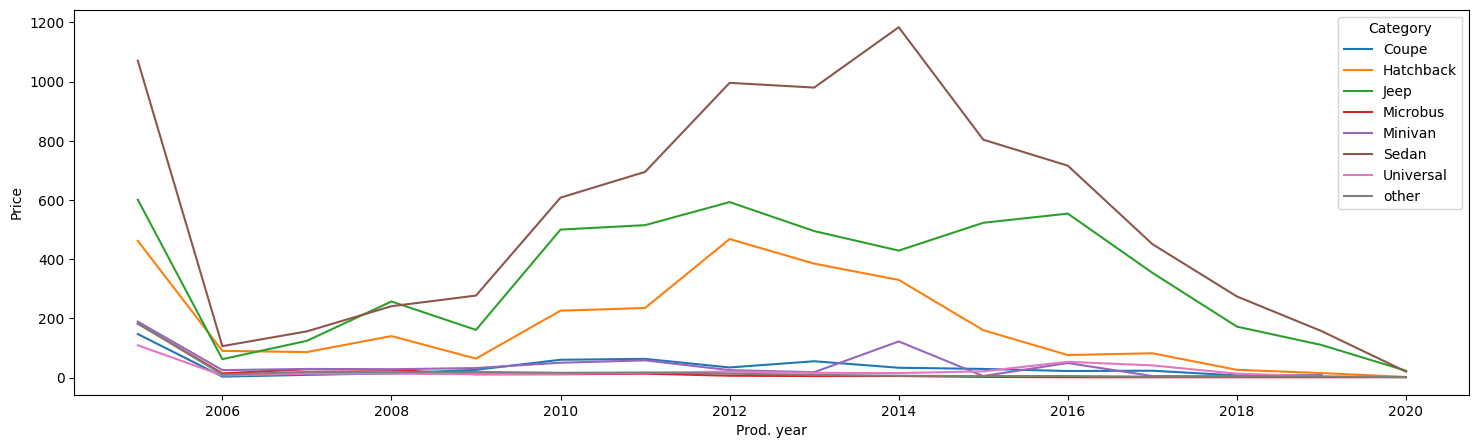

In [21]:
#newdf[['Prod. year','Category', 'Price']] creats a new dataframe of 3 columns and .groupby groups the newdataframe but 2 columns
import seaborn as sns
plt.figure(figsize=(18,5))
df1 = newdf[['Prod. year','Category', 'Price']].groupby(['Prod. year','Category']).count()
plot = sns.lineplot(x = 'Prod. year', y = 'Price',  data = df1 ,hue='Category')
plt.show()

In [22]:
df1.head(10)

Price
Prod. year Category        
2005       Coupe        147
           Hatchback    462
           Jeep         601
           Microbus     182
           Minivan      189
           Sedan       1071
           Universal    109
           other        183
2006       Coupe          3
           Hatchback     90

<function matplotlib.pyplot.show(close=None, block=None)>

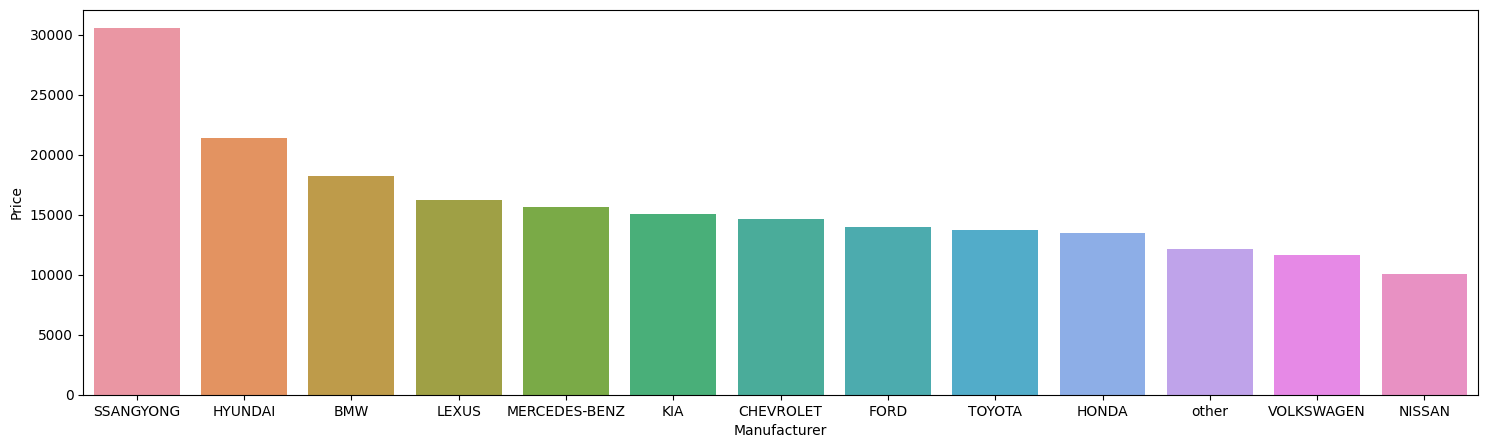

In [23]:
#newdf['Manufacturer']=newdf['Manufacturer'].astype('category')
df2=newdf[['Price','Manufacturer']].groupby(['Manufacturer'], as_index=False).agg('mean').sort_values(by='Price', ascending=False)
plt.figure(figsize=(18,5))
sns.barplot(x='Manufacturer',y='Price',data=df2)
plt.show

In [ ]:
df2

,Manufacturer,Price
9,SSANGYONG,30562.148526
4,HYUNDAI,22243.204740
6,LEXUS,19922.592812
0,BMW,19445.436992
7,MERCEDES-BENZ,17886.826213
5,KIA,15871.516291
10,TOYOTA,15657.520501
2,FORD,15656.597530
1,CHEVROLET,15535.417744
3,HONDA,15268.612369


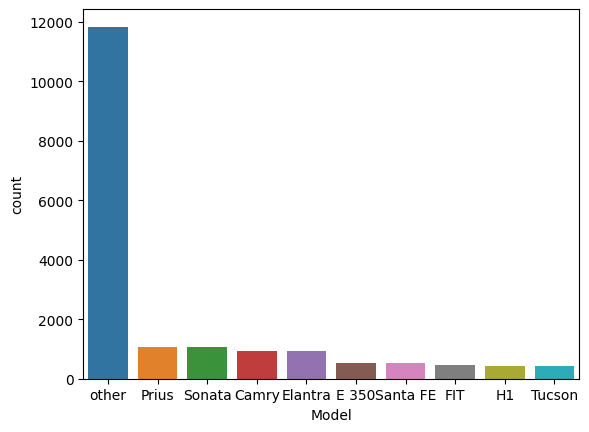

In [24]:
#df3=newdf[['Price','Model']].groupby(['Model'],as_index=False).count().sort_values(by='Price',ascending=False)
#plt.figure(figsize=(18,5))
#In Countplot you can only pass one axis because the other one is 'count'
# value_counts() returns a new Series that contains the count of each unique value in the original Series.
sns.countplot(data=newdf,x='Model',order=newdf.Model.value_counts().index[:10])
plt.show()

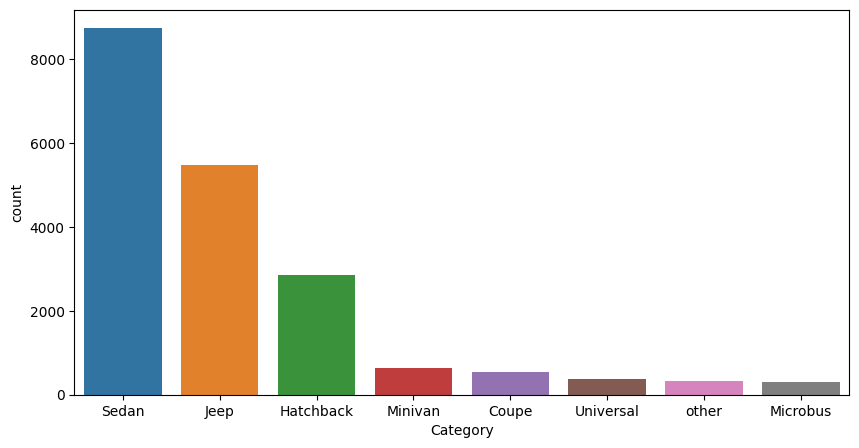

In [25]:
#.groupby('Category') it groups by categories(classes) - the ['Category']df
# value_counts() returns a new Series that contains the count of each unique value in the original Series.
#Both Groupby and Value_Counts give similar results . Difference - Groupby returns a dataframegroupby , value_counts return Pandas Series
#Groupby is used to group the data based on one or more columns  , value_counts is used for single column
plt.figure(figsize=(10,5))
sns.countplot(data=newdf,x='Category',order=newdf.Category.value_counts().sort_values(ascending=False).index[:10])
plt.show()

In [ ]:
newdf.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_turbo
0,13328.0,1399.0,LEXUS,other,2010,Jeep,True,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,16621.0,1018.0,CHEVROLET,other,2011,Jeep,False,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,8467.0,0.0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,3607.0,862.0,FORD,other,2011,Jeep,True,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,11726.0,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,0


In [26]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
#fit_transform method of the OrdinalEncoder expects a 2D array-like input
#By using values.reshape(-1, 1), we reshape the column values into a single column with multiple rows i.e(converts it into a 2D Array)
#The reshape operation is only applicable to columns of dtype object or 'category' because they represent categorical variables.

In [27]:
dffinal=pd.DataFrame()
for col in newdf:
    if newdf[col].dtype=='category' or newdf[col].dtype=='object':
      newdf[col]=enc.fit_transform(newdf[col].values.reshape(-1,1))
    else:
      continue

In [28]:
newdf

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_turbo
0,45654403,13328,1399.0,6.0,12.0,2010,2.0,1.0,2.0,3.5,186005.0,6.0,0.0,0.0,4,0.0,5.0,12,0
1,44731507,16621,1018.0,1.0,12.0,2011,2.0,0.0,5.0,3.0,192000.0,6.0,2.0,0.0,4,0.0,0.0,8,0
2,45774419,8467,0.0,3.0,5.0,2006,1.0,0.0,5.0,1.3,200000.0,4.0,3.0,1.0,4,1.0,0.0,2,0
3,45769185,3607,862.0,2.0,12.0,2011,2.0,1.0,2.0,2.5,168966.0,4.0,0.0,0.0,4,0.0,6.0,0,0
4,45809263,11726,446.0,3.0,5.0,2014,1.0,1.0,5.0,1.3,91901.0,4.0,0.0,1.0,4,0.0,5.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.0,7.0,12.0,2005,0.0,1.0,0.0,2.0,300000.0,4.0,1.0,2.0,2,0.0,5.0,5,1
19233,45778856,15681,831.0,4.0,9.0,2011,5.0,1.0,5.0,2.4,161600.0,4.0,2.0,1.0,4,0.0,4.0,8,0
19234,45804997,26108,836.0,4.0,10.0,2010,2.0,1.0,1.0,2.0,116365.0,4.0,0.0,1.0,4,0.0,3.0,4,0
19235,45793526,5331,1288.0,1.0,12.0,2007,2.0,1.0,1.0,2.0,51258.0,4.0,0.0,1.0,4,0.0,0.0,4,0


<Axes: >

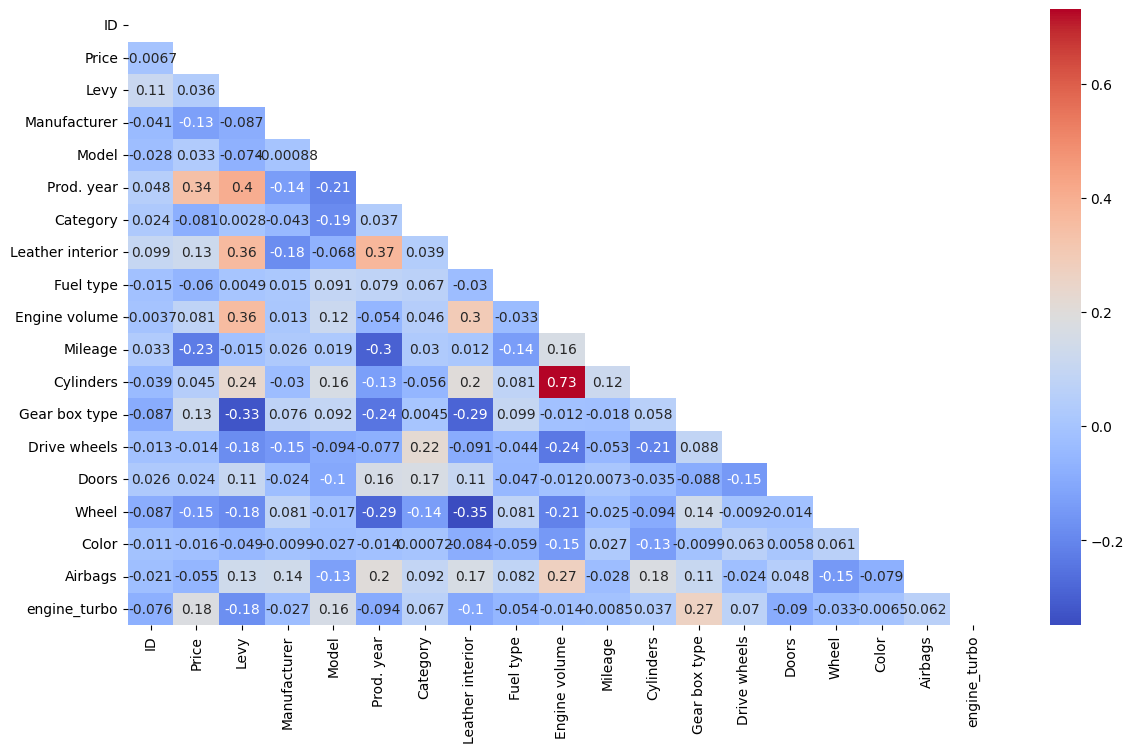

In [29]:
corr=newdf.corr()
plt.figure(figsize=(14,8))
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask)

#Building Model

In [30]:
train=newdf.drop('Price',axis=1)
test=newdf['Price']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.30,random_state=42)

In [32]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13465, 18), (13465,), (5772, 18), (5772,))

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train=minmax.fit_transform(x_train)
x_test=minmax.fit_transform(x_test)
#MinMaxScaler is used to proportionally scale numerical features in a dataset to a specific range, typically between 0 and 1.
#It is important to note that the scaling is applied to the x_train (input features of the training set) and x_test (input features of the test set)
#not the target variable (y_train and y_test). The target variable is typically left as is,unless required by specific problems

In [33]:
!pip install catboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [38]:
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(n_estimators=100, max_features=7)
adb = AdaBoostRegressor(n_estimators=150,learning_rate=.08)
gb = GradientBoostingRegressor(max_depth=7, n_estimators=500,learning_rate=0.5)
xgb = XGBRegressor(max_depth=7,n_estimators=500,learning_rate=.05)
catb = CatBoostRegressor(learning_rate=.07,max_depth=7,verbose=0)

In [58]:
regressors = [('Linear',lr),('KNeighbors',knn),('DecisionTree',dt),('RandomForest',rf),('AdaBoost',adb)
,('GradientBoosting',gb),('XGB',xgb),('CatBoost',catb)]

Linear : 31.0
KNeighbors : 67.5
DecisionTree : 48.0
RandomForest : 78.0
AdaBoost : 40.9
GradientBoosting : 67.60000000000001
XGB : 75.7
CatBoost : 78.4


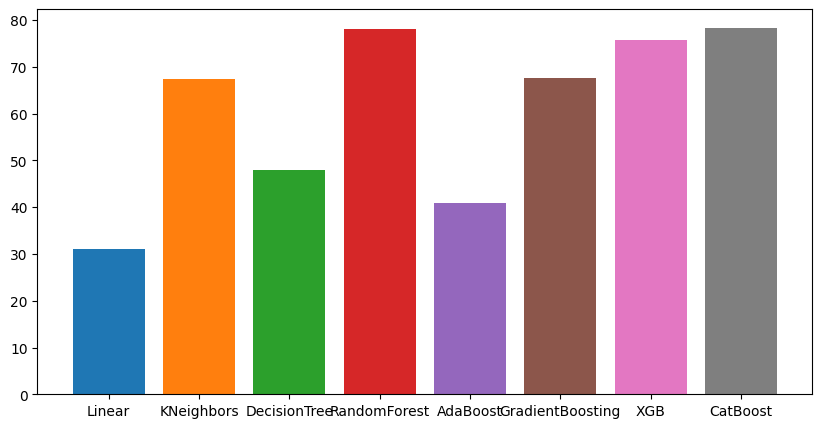

In [60]:
plt.figure(figsize=(10,5))
for regressor_name , regressor in regressors:
    regressor.fit(x_train,y_train)
    y_pred=regressor.predict(x_test)
    accuracy=round(r2_score(y_test,y_pred),3)*100
    print(f'{regressor_name} : {accuracy}')
    plt.bar(regressor_name,accuracy)
plt.show()
# R-squared score is a statistical measure that represents variance between y_test and y_pred it ranges from 0 to 1
#round() function is used to round the R-squared score to 3 decimal places for better readability.
#multiplication by 100 is performed to convert the R-squared score from a decimal value to a percentage value, making it easier to interpret.

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.fit_transform(x_test)
for regressor_name , regressor in regressors:
    regressor.fit(x_train_trans,y_train)
    y_pred=regressor.predict(x_test_trans)
    accuracy=round(r2_score(y_test,y_pred),3)*100
    print(f'{regressor_name}: {accuracy}')
# It creates new PolynomialFeatures by raising the existing features to different powers
# we capture non-linear relationships between the features and the target variable. This allows the model to learn and represent more complex patterns.
# Applying polynomial features can increase the dimensionality of the data, which may lead to overfitting if not handled properly.
# features are often referred as variables or attributes or dimensions

Linear: 51.1
KNeighbors: 67.4
DecisionTree: 50.0
RandomForest: 78.2
AdaBoost: 45.4
GradientBoosting: 67.5
XGB: 76.7
CatBoost: 78.60000000000001
